# Multivariate Neural Network Predictions

# Imports of Libraries and Datasets

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
!pip install tensorflow
!pip install tensorflow[and-cuda]
!pip install keras-tuner --upgrade
import keras_tuner as kt

zsh:1: no matches found: tensorflow[and-cuda]


In [ ]:
#project_path = '/content/gdrive/MyDrive/Samhällsbyggnadsprogrammet/AH2179/Project/' # set your own project path
#df=pd.read_csv(project_path+'preprocessingV4.csv',sep=';') #Jennifers path
#project_path = '/content/gdrive/MyDrive/Project Applied AI/Data/' #Linneas path
train_df=pd.read_csv('/Users/algotsjoholm/Downloads/preprocessingV5.csv',sep=';')
train_df = train_df.dropna()

In [ ]:
eval_df=pd.read_csv('/Users/algotsjoholm/Downloads/evalpreproV3.csv',sep=';') #change
eval_df = eval_df.dropna()
eval_df.describe()
#eval_df = eval_df[eval_df['PORTAL'] == 'E4S 58,140']

,Interval_1,FLOW_SUM,SPEED_WEIGHTED_AVG,FLOW_NEXT_15_SUM,FLOW_PREV_5_SUM,FLOW_PREV_15_SUM,FLOW_PREV_60_SUM,SPEED_NEXT_15_AVG,SPEED_PREV_5_AVG,SPEED_PREV_15_AVG,SPEED_PREV_60_AVG,IS_WEEKDAY,Interval_30
count,197436.000000,197436.000000,197436.000000,197436.000000,197436.000000,197436.000000,197436.000000,197436.000000,197436.000000,197436.000000,197436.000000,197436.000000,197436.000000
mean,442.061387,43.357093,19.925567,661.870155,215.871168,640.875985,2431.370778,19.844674,19.908797,19.935569,20.064293,0.687529,14.263331
std,82.307056,21.142930,2.362819,287.845567,100.108140,300.024576,1241.349348,2.135399,2.223883,2.132143,1.914030,0.463502,2.754295
min,299.000000,1.000000,0.560000,33.000000,8.000000,33.000000,100.000000,2.395607,1.685500,2.395607,4.005448,0.000000,9.000000
25%,371.000000,25.000000,18.976920,418.000000,124.000000,356.000000,1155.000000,18.948944,19.000403,19.017471,19.117466,0.000000,12.000000
50%,442.000000,48.000000,20.109010,770.000000,251.000000,755.000000,2923.000000,20.056423,20.137072,20.173206,20.325783,1.000000,14.000000
75%,513.000000,60.000000,21.216875,887.000000,295.000000,883.000000,3501.000000,21.083684,21.169776,21.186965,21.290345,1.000000,17.000000
max,584.000000,107.000000,35.560000,1254.000000,436.000000,1254.000000,4684.000000,24.257949,25.641731,24.576513,24.003175,1.000000,19.000000


In [ ]:
train_df
#train_df = train_df[train_df['PORTAL'] == 'E4S 58,140']
#train_df  = train_df[(train_df['Interval_1'] > 450) & (train_df['Interval_1'] <=510)]

,PORTAL,Date,Interval_1,FLOW_SUM,SPEED_WEIGHTED_AVG,FLOW_NEXT_15_SUM,FLOW_PREV_5_SUM,FLOW_PREV_15_SUM,FLOW_PREV_60_SUM,SPEED_NEXT_15_AVG,SPEED_PREV_5_AVG,SPEED_PREV_15_AVG,SPEED_PREV_60_AVG,IS_WEEKDAY,Interval_30
59,"E4S 55,620",2021-06-01,299,46.0,21.201522,809.0,271.0,817.0,3031.0,20.327355,20.489483,20.748605,20.927258,1,9
60,"E4S 55,620",2021-06-01,300,52.0,20.211538,799.0,260.0,822.0,3054.0,20.400551,20.472538,20.694453,20.907895,1,10
61,"E4S 55,620",2021-06-01,301,43.0,19.920930,803.0,256.0,814.0,3071.0,20.416276,20.279102,20.584840,20.885396,1,10
62,"E4S 55,620",2021-06-01,302,51.0,19.504314,823.0,254.0,807.0,3084.0,20.347728,20.111063,20.494610,20.854199,1,10
63,"E4S 55,620",2021-06-01,303,51.0,20.606471,825.0,243.0,783.0,3101.0,20.304024,20.281975,20.542771,20.830094,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604005,"E4S 58,140",2021-12-31,580,18.0,21.883889,272.0,93.0,240.0,827.0,21.605846,21.622043,21.793375,21.557267,0,19
604006,"E4S 58,140",2021-12-31,581,11.0,21.212727,280.0,77.0,240.0,822.0,21.614643,21.765195,21.823500,21.566363,0,19
604007,"E4S 58,140",2021-12-31,582,15.0,21.908000,293.0,69.0,247.0,823.0,21.522355,21.808551,21.851660,21.582333,0,19
604008,"E4S 58,140",2021-12-31,583,16.0,20.883125,300.0,71.0,253.0,826.0,21.543433,21.670704,21.781344,21.582276,0,19


In [ ]:
peak_eval_df=pd.read_csv('/Users/algotsjoholm/Downloads/peakevalpreproV2.csv',sep=';') #change
peak_eval_df = peak_eval_df.dropna()
peak_eval_df
#peak_eval_df = peak_eval_df[peak_eval_df['PORTAL'] == 'E4S 58,140']

,PORTAL,Date,Interval_1,FLOW_SUM,SPEED_WEIGHTED_AVG,FLOW_NEXT_15_SUM,FLOW_PREV_5_SUM,FLOW_PREV_15_SUM,FLOW_PREV_60_SUM,SPEED_NEXT_15_AVG,SPEED_PREV_5_AVG,SPEED_PREV_15_AVG,SPEED_PREV_60_AVG,IS_WEEKDAY,Interval_30
0,"E4S 55,620",2022-01-05,451,34.0,20.723529,535.0,183.0,528.0,2264.0,19.667645,19.924590,19.637822,19.783167,1,15
1,"E4S 55,620",2022-01-05,452,39.0,19.423846,542.0,194.0,535.0,2263.0,19.636033,19.861907,19.577645,19.760420,1,15
2,"E4S 55,620",2022-01-05,453,44.0,18.888636,532.0,195.0,550.0,2264.0,19.726297,19.685436,19.528818,19.752407,1,15
3,"E4S 55,620",2022-01-05,454,35.0,19.148571,535.0,193.0,541.0,2260.0,19.648710,19.564974,19.529261,19.732009,1,15
4,"E4S 55,620",2022-01-05,455,38.0,19.536842,524.0,190.0,549.0,2261.0,19.717195,19.504368,19.555647,19.708859,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41545,"E4S 58,140",2022-06-30,506,66.0,21.448182,919.0,330.0,946.0,3768.0,21.302590,21.522667,21.300666,21.365154,1,16
41546,"E4S 58,140",2022-06-30,507,50.0,20.661600,933.0,302.0,959.0,3760.0,21.347824,21.233344,21.265068,21.355133,1,16
41547,"E4S 58,140",2022-06-30,508,77.0,19.574805,921.0,317.0,970.0,3780.0,21.481379,21.013943,21.180227,21.318696,1,16
41548,"E4S 58,140",2022-06-30,509,49.0,22.113673,944.0,304.0,944.0,3757.0,21.406324,21.037599,21.176419,21.330000,1,16


# Model Creation

## Features and Normalization

In [ ]:
features = [
    'FLOW_NEXT_15_SUM',
    'SPEED_NEXT_15_AVG',
    'FLOW_SUM',
    'SPEED_WEIGHTED_AVG',
    'FLOW_PREV_5_SUM',
    'FLOW_PREV_15_SUM',
    'FLOW_PREV_60_SUM',
    'SPEED_PREV_5_AVG',
    'SPEED_PREV_15_AVG',
    'SPEED_PREV_60_AVG',
    'IS_WEEKDAY',
    'Interval_30'
]

train_df = train_df[features]
#train_df = train_df.iloc[:30000]

x = train_df.drop(['FLOW_NEXT_15_SUM', 'SPEED_NEXT_15_AVG'], axis=1)

y = train_df[['FLOW_NEXT_15_SUM', 'SPEED_NEXT_15_AVG']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler_x = MinMaxScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)


scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

## Find Best Hyperparameters

In [ ]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

def build_model(hp):
    model = Sequential()

    model.add(Dense(units=hp.Choice('l1_units', values=[32, 64, 128, 256]),
                    activation=hp.Choice('activation_1', ['relu', 'tanh']),
                    input_dim=X_train.shape[1]))

    for i in range(hp.Int('num_layers', 1, 2)):
        model.add(Dense(units=hp.Choice(f'l{i+2}_units', values=[32, 64, 128, 256]),
                        activation=hp.Choice(f'activation_{i+2}', ['relu', 'tanh'])))
        #model.add(Dropout(rate=hp.Choice(f'dropout_{i+2}', values=[0.0, 0.2])))

    model.add(Dense(2))
    #model.add(Dense(1))

    model.compile(
        optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='mae',
        metrics=['mae']
    )

    return model

tuner = kt.Hyperband(build_model,
                     objective='val_mae',
                     max_epochs=50,
                     factor=3,
                     seed=42,
                     directory='my_dir',
                     project_name='tune_exponential_units13')

early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

tuner.search(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[early_stop, reduce_lr])

Trial 88 Complete [00h 06m 28s]
val_mae: 0.14828498661518097

Best val_mae So Far: 0.13701264560222626
Total elapsed time: 01h 16m 38s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

for hp_name, hp_value in best_hps.values.items():
    print(f"{hp_name}: {hp_value}")

l1_units: 128
activation_1: tanh
num_layers: 2
l2_units: 64
activation_2: relu
learning_rate: 0.00036276965095376624
l3_units: 256
activation_3: relu
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0047


## Train Best Model

In [ ]:
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[early_stop, reduce_lr])

Epoch 1/50
9531/9531 ━━━━━━━━━━━━━━━━━━━━ 5s 486us/step - loss: 0.2311 - mae: 0.2311 - val_loss: 0.1738 - val_mae: 0.1738 - learning_rate: 3.6277e-04
Epoch 2/50
9531/9531 ━━━━━━━━━━━━━━━━━━━━ 5s 485us/step - loss: 0.1681 - mae: 0.1681 - val_loss: 0.1600 - val_mae: 0.1600 - learning_rate: 3.6277e-04
Epoch 3/50
9531/9531 ━━━━━━━━━━━━━━━━━━━━ 5s 515us/step - loss: 0.1621 - mae: 0.1621 - val_loss: 0.1633 - val_mae: 0.1633 - learning_rate: 3.6277e-04
Epoch 4/50
9531/9531 ━━━━━━━━━━━━━━━━━━━━ 5s 515us/step - loss: 0.1581 - mae: 0.1581 - val_loss: 0.1560 - val_mae: 0.1560 - learning_rate: 3.6277e-04
Epoch 5/50
9531/9531 ━━━━━━━━━━━━━━━━━━━━ 5s 514us/step - loss: 0.1554 - mae: 0.1554 - val_loss: 0.1499 - val_mae: 0.1499 - learning_rate: 3.6277e-04
Epoch 6/50
9531/9531 ━━━━━━━━━━━━━━━━━━━━ 5s 490us/step - loss: 0.1535 - mae: 0.1535 - val_loss: 0.1511 - val_mae: 0.1511 - learning_rate: 3.6277e-04
Epoch 7/50
9531/9531 ━━━━━━━━━━━━━━━━━━━━ 5s 533us/step - loss: 0.1520 - mae: 0.1520 - val_loss: 0.1

9531/9531 ━━━━━━━━━━━━━━━━━━━━ 5s 482us/step - loss: 0.1388 - mae: 0.1388 - val_loss: 0.1388 - val_mae: 0.1388 - learning_rate: 2.8341e-06
Epoch 46/50
9531/9531 ━━━━━━━━━━━━━━━━━━━━ 5s 497us/step - loss: 0.1384 - mae: 0.1384 - val_loss: 0.1387 - val_mae: 0.1387 - learning_rate: 2.8341e-06
Epoch 47/50
9531/9531 ━━━━━━━━━━━━━━━━━━━━ 5s 517us/step - loss: 0.1382 - mae: 0.1382 - val_loss: 0.1387 - val_mae: 0.1387 - learning_rate: 1.4171e-06
Epoch 48/50
9531/9531 ━━━━━━━━━━━━━━━━━━━━ 5s 482us/step - loss: 0.1385 - mae: 0.1385 - val_loss: 0.1387 - val_mae: 0.1387 - learning_rate: 1.4171e-06
Epoch 49/50
9531/9531 ━━━━━━━━━━━━━━━━━━━━ 5s 498us/step - loss: 0.1379 - mae: 0.1379 - val_loss: 0.1387 - val_mae: 0.1387 - learning_rate: 1.4171e-06
Epoch 50/50
9531/9531 ━━━━━━━━━━━━━━━━━━━━ 5s 514us/step - loss: 0.1387 - mae: 0.1387 - val_loss: 0.1387 - val_mae: 0.1387 - learning_rate: 7.0853e-07


In [ ]:
pd.DataFrame(history.history)

,loss,mae,val_loss,val_mae,learning_rate
0,0.189591,0.189591,0.173824,0.173824,3.627696e-04
1,0.166829,0.166829,0.159965,0.159965,3.627696e-04
2,0.160874,0.160874,0.163273,0.163273,3.627696e-04
3,0.156832,0.156832,0.155976,0.155976,3.627696e-04
4,0.154815,0.154815,0.149945,0.149945,3.627696e-04
5,0.153264,0.153264,0.151121,0.151121,3.627696e-04
6,0.152056,0.152056,0.150415,0.150415,3.627696e-04
7,0.151027,0.151027,0.149718,0.149718,3.627696e-04
8,0.150234,0.150234,0.154460,0.154460,3.627696e-04
9,0.149652,0.149652,0.150759,0.150759,3.627696e-04


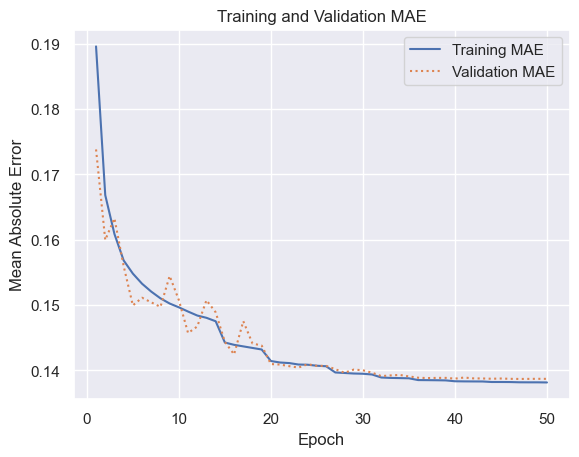

In [ ]:
sns.set()

err = history.history['mae']
val_err = history.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.show()

# Evaluation Results

## Evaluation on Test Split

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_model.predict(X_test)

y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test)

mae_1 = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
mse_1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
r2_1 = r2_score(y_test[:, 0], y_pred[:, 0])

# Calculate metrics for the second target variable (e.g., SPEED_NEXT_15_AVG)
mae_2 = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
mse_2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])
r2_2 = r2_score(y_test[:, 1], y_pred[:, 1])

# Optionally, calculate the overall mean of the MAE, MSE, and R^2 across both outputs
mae_avg = (mae_1 + mae_2) / 2
mse_avg = (mse_1 + mse_2) / 2
r2_avg = (r2_1 + r2_2) / 2

print('--------------------------------------Result from the best model on test data ---------------------------------------------')
print(f"Target 1 - Mean Absolute Error (MAE): {mae_1}")
print(f"Target 1 - Mean Squared Error (MSE): {mse_1}")
print(f"Target 1 - R-squared (R^2): {r2_1}")
print()
print(f"Target 2 - Mean Absolute Error (MAE): {mae_2}")
print(f"Target 2 - Mean Squared Error (MSE): {mse_2}")
print(f"Target 2 - R-squared (R^2): {r2_2}")
print()
print(f"Average MAE: {mae_avg}")
print(f"Average MSE: {mse_avg}")
print(f"Average R-squared: {r2_avg}")

'''mae_1 = mean_absolute_error(y_test, y_pred)
mse_1 = mean_squared_error(y_test, y_pred)
r2_1 = r2_score(y_test, y_pred)

print('--------------------------------------Result from the best model on test data ---------------------------------------------')
print(f"Target 1 - Mean Absolute Error (MAE): {mae_1}")
print(f"Target 1 - Mean Squared Error (MSE): {mse_1}")
print(f"Target 1 - R-squared (R^2): {r2_1}")'''


2979/2979 ━━━━━━━━━━━━━━━━━━━━ 1s 261us/step
--------------------------------------Result from the best model on test data ---------------------------------------------
Target 1 - Mean Absolute Error (MAE): 52638715.93482733
Target 1 - Mean Squared Error (MSE): 3294773147833469.5
Target 1 - R-squared (R^2): -5.288319060242047

Target 2 - Mean Absolute Error (MAE): 123.79067797901165
Target 2 - Mean Squared Error (MSE): 15370.323860719222
Target 2 - R-squared (R^2): -207.09940731352407

Average MAE: 26319419.862752654
Average MSE: 1647386573924420.0
Average R-squared: -106.19386318688306


'mae_1 = mean_absolute_error(y_test, y_pred)\nmse_1 = mean_squared_error(y_test, y_pred)\nr2_1 = r2_score(y_test, y_pred)\n\nprint(\'--------------------------------------Result from the best model on test data ---------------------------------------------\')\nprint(f"Target 1 - Mean Absolute Error (MAE): {mae_1}")\nprint(f"Target 1 - Mean Squared Error (MSE): {mse_1}")\nprint(f"Target 1 - R-squared (R^2): {r2_1}")'

## Evaluation on Full Final Evaluation Dataset

In [ ]:
eval_df = eval_df[features]

x_eval = eval_df.drop(['FLOW_NEXT_15_SUM', 'SPEED_NEXT_15_AVG'], axis=1)
y_eval = eval_df[['FLOW_NEXT_15_SUM', 'SPEED_NEXT_15_AVG']]
#y_eval = eval_df['SPEED_NEXT_15_AVG']

x_eval = scaler_x.transform(x_eval)

y_pred = best_model.predict(x_eval)

y_pred = scaler_y.inverse_transform(y_pred)
#y_eval = scaler_y.inverse_transform(y_eval)

mae_1 = mean_absolute_error(y_eval['FLOW_NEXT_15_SUM'], y_pred[:, 0])
mse_1 = mean_squared_error(y_eval['FLOW_NEXT_15_SUM'], y_pred[:, 0])
r2_1 = r2_score(y_eval['FLOW_NEXT_15_SUM'], y_pred[:, 0])

# Calculate metrics for the second target variable (e.g., SPEED_NEXT_15_AVG)
mae_2 = mean_absolute_error(y_eval['SPEED_NEXT_15_AVG'], y_pred[:, 1])
mse_2 = mean_squared_error(y_eval['SPEED_NEXT_15_AVG'], y_pred[:, 1])
r2_2 = r2_score(y_eval['SPEED_NEXT_15_AVG'], y_pred[:, 1])

# Optionally, calculate the overall mean of the MAE, MSE, and R^2 across both outputs
mae_avg = (mae_1 + mae_2) / 2
mse_avg = (mse_1 + mse_2) / 2
r2_avg = (r2_1 + r2_2) / 2

print('--------------------------------------Result from the best model on test data ---------------------------------------------')
print(f"Target 1 - Mean Absolute Error (MAE): {mae_1}")
print(f"Target 1 - Mean Squared Error (MSE): {mse_1}")
print(f"Target 1 - R-squared (R^2): {r2_1}")
print()
print(f"Target 2 - Mean Absolute Error (MAE): {mae_2}")
print(f"Target 2 - Mean Squared Error (MSE): {mse_2}")
print(f"Target 2 - R-squared (R^2): {r2_2}")
print()
print(f"Average MAE: {mae_avg}")
print(f"Average MSE: {mse_avg}")
print(f"Average R-squared: {r2_avg}")

'''mae_1 = mean_absolute_error(y_eval, y_pred)
mse_1 = mean_squared_error(y_eval, y_pred)
r2_1 = r2_score(y_eval, y_pred)

print('--------------------------------------Result from the best model on test data ---------------------------------------------')
print(f"Target 1 - Mean Absolute Error (MAE): {mae_1}")
print(f"Target 1 - Mean Squared Error (MSE): {mse_1}")
print(f"Target 1 - R-squared (R^2): {r2_1}")'''


6170/6170 ━━━━━━━━━━━━━━━━━━━━ 2s 258us/step
--------------------------------------Result from the best model on test data ---------------------------------------------
Target 1 - Mean Absolute Error (MAE): 42.052270203766625
Target 1 - Mean Squared Error (MSE): 4032.55884863713
Target 1 - R-squared (R^2): 0.9513297224991

Target 2 - Mean Absolute Error (MAE): 0.36715719433099286
Target 2 - Mean Squared Error (MSE): 0.8193672950396509
Target 2 - R-squared (R^2): 0.8203105368941936

Average MAE: 21.20971369904881
Average MSE: 2016.6891079660847
Average R-squared: 0.8858201296966468


'mae_1 = mean_absolute_error(y_eval, y_pred)\nmse_1 = mean_squared_error(y_eval, y_pred)\nr2_1 = r2_score(y_eval, y_pred)\n\nprint(\'--------------------------------------Result from the best model on test data ---------------------------------------------\')\nprint(f"Target 1 - Mean Absolute Error (MAE): {mae_1}")\nprint(f"Target 1 - Mean Squared Error (MSE): {mse_1}")\nprint(f"Target 1 - R-squared (R^2): {r2_1}")'

## Evaluation on Peak Final Evaluation Dataset

In [ ]:
eval_df_peak= peak_eval_df[features]

x_eval = eval_df_peak.drop(['FLOW_NEXT_15_SUM', 'SPEED_NEXT_15_AVG'], axis=1)
y_eval = eval_df_peak[['FLOW_NEXT_15_SUM', 'SPEED_NEXT_15_AVG']]
#y_eval = eval_df_peak['SPEED_NEXT_15_AVG']

x_eval = scaler_x.transform(x_eval)


#y_eval = scaler_y.inverse_transform(y_eval)

y_pred = best_model.predict(x_eval)

y_pred = scaler_y.inverse_transform(y_pred)

mae_1 = mean_absolute_error(y_eval['FLOW_NEXT_15_SUM'], y_pred[:, 0])
mse_1 = mean_squared_error(y_eval['FLOW_NEXT_15_SUM'], y_pred[:, 0])
r2_1 = r2_score(y_eval['FLOW_NEXT_15_SUM'], y_pred[:, 0])

# Calculate metrics for the second target variable (e.g., SPEED_NEXT_15_AVG)
mae_2 = mean_absolute_error(y_eval['SPEED_NEXT_15_AVG'], y_pred[:, 1])
mse_2 = mean_squared_error(y_eval['SPEED_NEXT_15_AVG'], y_pred[:, 1])
r2_2 = r2_score(y_eval['SPEED_NEXT_15_AVG'], y_pred[:, 1])

print('--------------------------------------Result from the best model on test data ---------------------------------------------')
print(f"Target 1 - Mean Absolute Error (MAE): {mae_1}")
print(f"Target 1 - Mean Squared Error (MSE): {mse_1}")
print(f"Target 1 - R-squared (R^2): {r2_1}")
print()
print(f"Target 2 - Mean Absolute Error (MAE): {mae_2}")
print(f"Target 2 - Mean Squared Error (MSE): {mse_2}")
print(f"Target 2 - R-squared (R^2): {r2_2}")
print()
print(f"Average MAE: {mae_avg}")
print(f"Average MSE: {mse_avg}")
print(f"Average R-squared: {r2_avg}")

'''mae_1 = mean_absolute_error(y_eval, y_pred)
mse_1 = mean_squared_error(y_eval, y_pred)
r2_1 = r2_score(y_eval, y_pred)

print('--------------------------------------Result from the best model on test data ---------------------------------------------')
print(f"Target 1 - Mean Absolute Error (MAE): {mae_1}")
print(f"Target 1 - Mean Squared Error (MSE): {mse_1}")
print(f"Target 1 - R-squared (R^2): {r2_1}")'''

1299/1299 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step
--------------------------------------Result from the best model on test data ---------------------------------------------
Target 1 - Mean Absolute Error (MAE): 42.4541343250114
Target 1 - Mean Squared Error (MSE): 3955.5589172200844
Target 1 - R-squared (R^2): 0.9414276798408092

Target 2 - Mean Absolute Error (MAE): 0.3642500432372994
Target 2 - Mean Squared Error (MSE): 0.8495356884103603
Target 2 - R-squared (R^2): 0.8067224614929944

Average MAE: 21.20971369904881
Average MSE: 2016.6891079660847
Average R-squared: 0.8858201296966468


'mae_1 = mean_absolute_error(y_eval, y_pred)\nmse_1 = mean_squared_error(y_eval, y_pred)\nr2_1 = r2_score(y_eval, y_pred)\n\nprint(\'--------------------------------------Result from the best model on test data ---------------------------------------------\')\nprint(f"Target 1 - Mean Absolute Error (MAE): {mae_1}")\nprint(f"Target 1 - Mean Squared Error (MSE): {mse_1}")\nprint(f"Target 1 - R-squared (R^2): {r2_1}")'

# Save Model

In [ ]:
best_model.save('best_multivar_NN.keras')